# Aman Rohada
021230022987 |
Business Analytics(2022-24)


Consider the data present in the Insurance dataset file.<br>
Following is the attribute related information:<br><br>

age: age of primary beneficiary<br>
sex: insurance contractor gender, female, male<br>
bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9<br>
children: Number of children covered by health insurance / Number of dependents<br>
smoker: Smoking, yes or no<br>
region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.<br>
charges: Individual medical costs billed by health insurance<br><br>

Problem statement: To predict the approximate insurance cost based upon the rest of the features provided for each individual.

Import the libraries- Pandas, Numpy, Matplotlib and Seaborn

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
import warnings
warnings.filterwarnings("ignore")

Create a dataframe named "data" from the given datafile and print it's head

In [20]:
data=pd.read_csv(r"C:\Users\amanr\Downloads\datasets_insurance.csv", header=0)
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Understand the problem statement and the data, try understanding importance of each variable given.<br>
Perform Exploratory Data Analysis- print datatypes, dimension and descriptive statistics.

In [21]:
print(data.dtypes)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [22]:
print(data.shape)

(1338, 7)


In [23]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Check if there are missing values. If yes, handle them.

In [24]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Check for Assumption 1- There should be no outliers in the data.<br>
Hint: Think logically, nothing needs to be worked upon here.

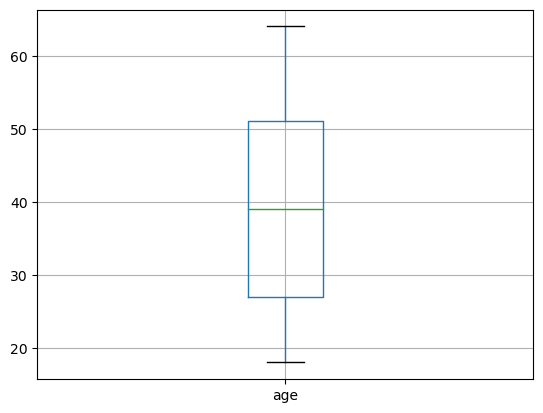

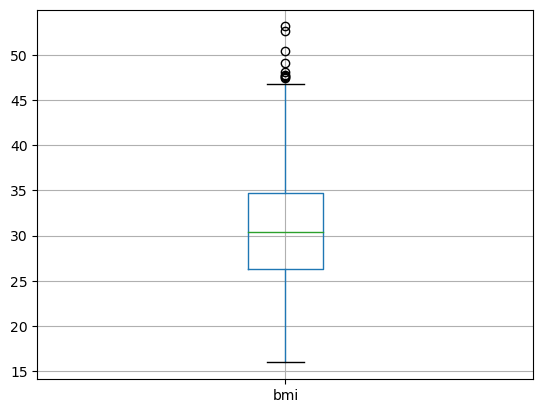

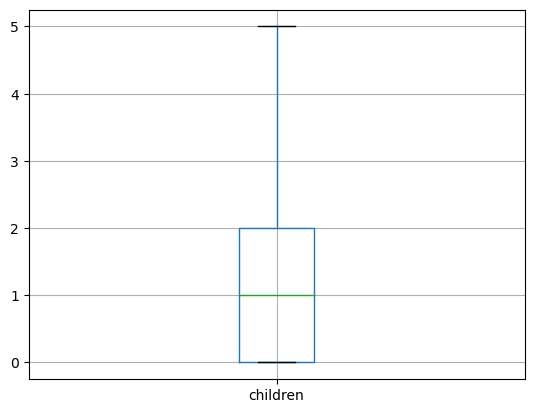

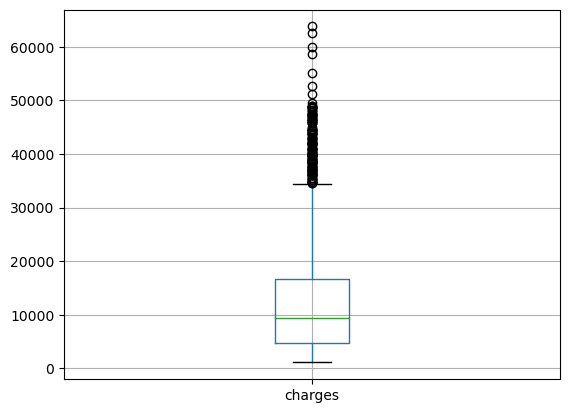

In [25]:
for x in data.columns:
    if data[x].dtypes!='object':
        data.boxplot(column = x)
        plt.show()

Check for Assumption 2-Assumption of Linearity<br>
Hint: Use kind="scatter" in the pairplot, because it wont be able to fit a line in categorical variables. Some might show no relationship, but remember they are categorical or important variables, leave it as it is.

In [26]:
sns.pairplot(data,x_vars=['age', 'bmi', 'children'],
             y_vars="charges", kind='reg')

Create X and Y

In [27]:
data['sex'].replace(to_replace = 'female', value = 0, inplace=True)
data['sex'].replace(to_replace = 'male', value = 1, inplace=True)
data['smoker'].replace(to_replace = 'no', value = 0, inplace=True)
data['smoker'].replace(to_replace = 'yes', value = 1, inplace=True)
data['region'].replace(to_replace = 'northeast', value = 0, inplace=True)
data['region'].replace(to_replace = 'northwest', value = 1, inplace=True)
data['region'].replace(to_replace = 'southeast', value = 2, inplace=True)
data['region'].replace(to_replace = 'southwest', value = 3, inplace=True)

In [28]:
X=data[['age','sex','bmi','children','smoker','region']]
y=data['charges']

In [29]:
print(X.shape)
print(y.shape)

(1338, 6)
(1338,)


Check for Assumption 3-Assumption of Normality <br>
Hint: You will find the data is highly positively skewed. So log transform the data.

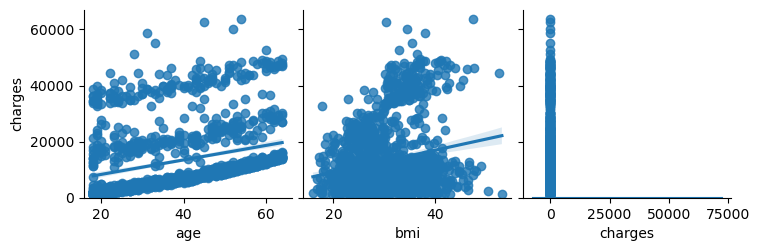

In [30]:
sns.distplot(y)
plt.show()

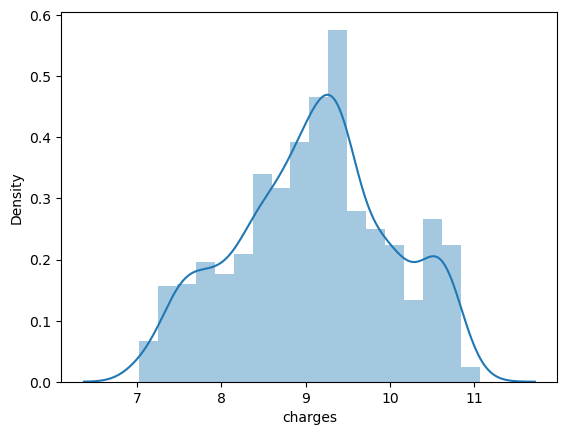

In [31]:
## The data is positively skewed, so we need to log transform the data

Y_log = np.log(y)

sns.distplot(Y_log)
plt.show()

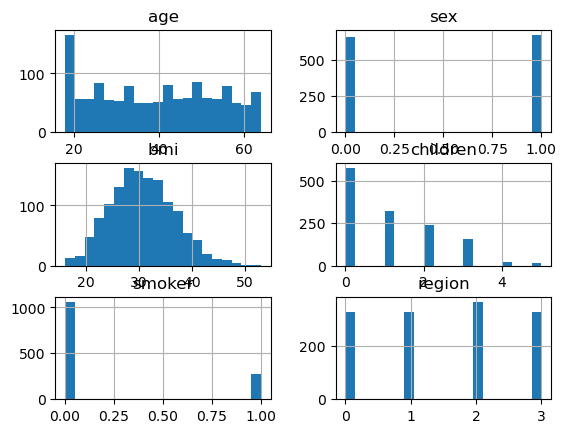

In [32]:
X.hist(bins=20)
plt.show()

Convert Categorical variables to numerical- Sex, Smoker and Region<br>
Hint: Make use of replace function.<br>
Sex: Female-0,Male-1<br>
Smoker: No-0, Yes-1<br>
Region: northeast-0,northwest-1,southeast-2,southwest-3

In [33]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


Check for the normality in the X variables. <br>
Hint: Some variables make not look normal but realize that they are actually discrete valued.
    No transformation required.

In [34]:
from scipy.stats import skew

In [36]:
# import necessary libraries
import numpy as np
from scipy.stats import skew

# finding the skewness in each variable
data_num_skew = X.apply(lambda i: skew(i.dropna()))

# subsetting the variables that are highly skewed
data_num_skewed = data_num_skew[(data_num_skew > 0.75) | (data_num_skew < -0.75)]

# print the skewness of all variables and the variables that are highly skewed
print(data_num_skew)
print(data_num_skewed)

# apply log + 1 transformation for all numeric features with skewness over 0.75
X[data_num_skewed.index] = np.log1p(X[data_num_skewed.index])
# log1p to ensure that we don't get infinite values from log 0


age         0.055610
sex        -0.020928
bmi         0.283729
children    0.263787
smoker      1.463124
region     -0.038058
dtype: float64
smoker    1.463124
dtype: float64


Check for Assumption 4-No multicollinearity in the data<br>
Try both the approaches-correlation and VIF.<br>
Hint: You will find no high correlation. VIF might be high for a few variables but do not eliminate them because they are important as per the domain knowledge.

               age       sex       bmi  children    smoker    region
age       1.000000 -0.020856  0.109272  0.048406 -0.025019  0.002127
sex      -0.020856  1.000000  0.046371  0.016296  0.076185  0.004588
bmi       0.109272  0.046371  1.000000  0.016178  0.003750  0.157566
children  0.048406  0.016296  0.016178  1.000000  0.013245  0.013722
smoker   -0.025019  0.076185  0.003750  0.013245  1.000000 -0.002181
region    0.002127  0.004588  0.157566  0.013722 -0.002181  1.000000


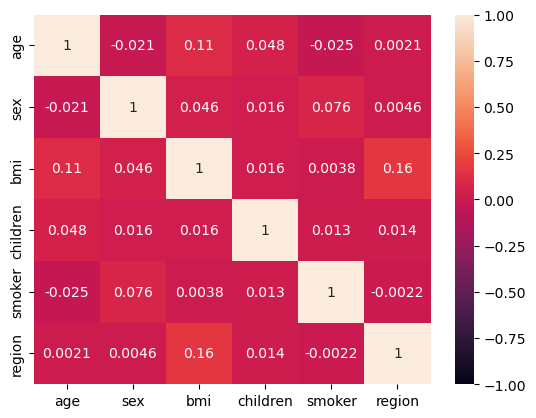

In [39]:
corr_df = X.corr(method = "pearson")
print(corr_df)

sns.heatmap(corr_df,vmax=1.0,vmin=-1.0,annot=True)
plt.show()

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

vif_df = pd.DataFrame()
vif_df["features"] = X.columns
vif_df["VIF Factor"] = [vif(X.values, i) for i in range(X.shape[1])]
vif_df.round(2)

,features,VIF Factor
0,age,7.57
1,sex,2.00
2,bmi,10.48
3,children,2.05
4,smoker,1.26
5,region,2.92


Split the data into train and test.<br>
Hint: Make sure you are considering the log transformed Y.

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.2, random_state=10)
print(X_train.shape)


(1070, 6)


In [44]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)
print("Percent of train data",X_train.shape[0]/X.shape[0]*100)

(1070, 6)
(1070,)
(268, 6)
(268,)
Percent of train data 79.97010463378177


Build a base Linear Regression model using sklearn.

In [45]:
#create a model object
lm = LinearRegression()
#train the model object
lm.fit(X_train,Y_train)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)


-12592.27163092921
[  259.26601478  -258.10661594   344.80222984  1189.0446963
 45702.82174758  -252.35457137]


Create a zipped list of the slope coefficients to understand the equation better.<br>
Write down the equation manually and try making sense out of it.

In [46]:
print(list(zip(X.columns, lm.coef_)))

[('age', 259.2660147750204), ('sex', -258.106615943017), ('bmi', 344.8022298404144), ('children', 1189.0446962972132), ('smoker', 45702.821747579255), ('region', -252.3545713674165)]


In [47]:

X1=100
X2=100
X3=np.log1p(100)

Y_pred=3.3532913858151545+(0.0437425*X1)+(0.19303708*X2)+(-0.04895137*X3)
print(Y_pred)

26.805332913800665


In [48]:
X1=100
X2=200
X3=np.log1p(0)

Y_pred=3.3532913858151545+(0.0437425*X1)+(0.19303708*X2)+(-0.04895137*X3)
print(Y_pred)

46.33495738581516


In [49]:
X1=100
X2=100
X3=np.log1p(0)

Y_pred=3.3532913858151545+(0.0437425*X1)+(0.19303708*X2)+(-0.04895137*X3)
print(Y_pred)

27.031249385815155


Predict using the model.

In [50]:
Y_pred=lm.predict(X_test)
print(Y_pred)

[ 7.96139616e+03  5.75895828e+03  1.53055986e+04  1.13658861e+04
  3.64929027e+03  9.76963649e+03  8.82450758e+03  2.62336191e+04
  7.88538046e+03  3.08406316e+04  1.83720557e+03  4.07377694e+03
  7.27326243e+03  1.11179189e+04  1.30585281e+04  1.09986563e+04
  5.92868037e+03  1.80978117e+04  1.05481821e+04  3.10370685e+04
  3.42576640e+04  4.20122646e+03  1.14798731e+03  7.48505271e+03
  4.60947387e+03  1.32616186e+04  1.18987245e+04  1.02070084e+04
  6.49011641e+03  3.11526235e+04 -1.85430353e+03  3.40483552e+04
  9.53125278e+03  7.49582288e+03  8.41440885e+03  1.22273575e+04
  1.33227230e+04  1.25286326e+04  9.80481812e+03  8.55414290e+03
  1.59427403e+04  9.91277560e+03  5.39863995e+03  1.13938184e+04
  5.49686461e+03  7.64329720e+03  6.77606222e+03  3.41075117e+04
  1.09629317e+04  1.05184478e+04  3.30019298e+04  5.57886947e+03
  1.05035468e+04  1.47247873e+04  1.11955613e+04  1.33455459e+04
  1.23267568e+04  7.75771870e+03  7.77695184e+03  3.49931892e+04
  5.95074791e+02  3.32964

In [51]:
new_df=pd.DataFrame()
new_df=X_test.copy()

new_df["Actual sales"]=Y_test
new_df["Predicted sales"]=Y_pred
new_df=new_df.reset_index().drop("index", axis=1)
new_df

,age,sex,bmi,children,smoker,region,Actual sales,Predicted sales
0,37,0,27.740,1.386294,0.000000,1,7281.50560,7961.396158
1,36,0,26.885,0.000000,0.000000,1,5267.81815,5758.958279
2,59,1,37.100,0.693147,0.000000,3,12347.17200,15305.598617
3,61,0,25.080,0.000000,0.000000,2,24513.09126,11365.886052
4,29,0,26.030,0.000000,0.000000,1,3736.46470,3649.290269
...,...,...,...,...,...,...,...,...
263,50,1,34.200,1.098612,0.526589,3,42856.83800,36520.998915
264,26,0,40.185,0.000000,0.000000,1,3201.24515,7752.167788
265,19,1,27.265,1.098612,0.000000,1,22493.65964,2530.653374
266,57,1,40.945,0.000000,0.000000,0,11566.30055,16045.711896


Evaluate the model.

In [52]:
 lm.score(X_train, Y_train)

0.7634502253961377

In [55]:
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared=1-(1-r2)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)




R-squared: 0.69604935291416
RMSE: 6529.1109917210515
Adj R-square: 0.6946791771947649


In [56]:
new_df["Deviation"]=new_df["Actual sales"]-new_df["Predicted sales"]
new_df.to_excel("Sales Prediction.xlsx",header=True,index=True)
new_df.head()

,age,sex,bmi,children,smoker,region,Actual sales,Predicted sales,Deviation
0,37,0,27.740,1.386294,0.0,1,7281.50560,7961.396158,-679.890558
1,36,0,26.885,0.000000,0.0,1,5267.81815,5758.958279,-491.140129
2,59,1,37.100,0.693147,0.0,3,12347.17200,15305.598617,-2958.426617
3,61,0,25.080,0.000000,0.0,2,24513.09126,11365.886052,13147.205208
4,29,0,26.030,0.000000,0.0,1,3736.46470,3649.290269,87.174431


In [57]:
sns.regplot(x=Y_train,y=lm.predict(X_train),ci=95)

<AxesSubplot:xlabel='charges'>

In [58]:
sns.regplot(x=Y_test,y=lm.predict(X_test),ci=95)

<AxesSubplot:xlabel='charges'>

Perform Ridge and Lasso regression. Evaluate them as well.<br>
Hint:Look at the fun in the Lasso Regression, ignore such model.

In [59]:
## RIDGE

lm = Ridge()
#train the model object
lm.fit(X_train,Y_train)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

-12500.662790594493
[  259.02987979  -224.20769981   344.95760503  1183.45383735
 44762.48129328  -252.79455351]


In [60]:
Y_pred=lm.predict(X_test)

print(Y_pred)

[ 8040.38755317  5845.80353971 15417.74359417 11446.10750388
  3737.65562888  9852.60380677  8932.268991   25824.7472979
  7963.30311068 30423.88595199  1954.86248004  4163.71874488
  7392.66079964 11197.2470571  13140.50672683 11079.39148033
  6014.91178296 18205.55633761 10629.47367409 30659.38154372
 33878.60461878  4293.37018889  1239.43442212  7568.0494334
  4691.56777477 13343.72648137 12012.14463542 10281.01132604
  6573.4374444  30772.95086395 -1731.52585523 33667.50333729
  9616.29495701  7608.2377366   8534.36374723 12310.41342604
 13437.81480623 12646.24370294  9888.87127268  8666.05586658
 16024.31827472 10023.83552609  5485.32284245 11480.70535185
  5623.63410993  7724.30084408  6889.57799104 33725.19683522
 11078.34526158 10600.3784933  32595.7015404   5668.13103922
 10618.46941999 14801.50294626 11312.54494931 13460.67466074
 12406.99373216  7873.87472786  7892.05763615 34575.89972456
   720.28797001 32911.71336636 36443.81305642  1726.8598771
 27595.39540822  9815.39486

In [61]:
new_df=pd.DataFrame()
new_df=X_test.copy()

new_df["Actual charges"]=Y_test
new_df["Predicted charges"]=Y_pred
new_df=new_df.reset_index().drop("index", axis=1)

new_df

,age,sex,bmi,children,smoker,region,Actual charges,Predicted charges
0,37,0,27.740,1.386294,0.000000,1,7281.50560,8040.387553
1,36,0,26.885,0.000000,0.000000,1,5267.81815,5845.803540
2,59,1,37.100,0.693147,0.000000,3,12347.17200,15417.743594
3,61,0,25.080,0.000000,0.000000,2,24513.09126,11446.107504
4,29,0,26.030,0.000000,0.000000,1,3736.46470,3737.655629
...,...,...,...,...,...,...,...,...
263,50,1,34.200,1.098612,0.526589,3,42856.83800,36137.378649
264,26,0,40.185,0.000000,0.000000,1,3201.24515,7843.440889
265,19,1,27.265,1.098612,0.000000,1,22493.65964,2649.328702
266,57,1,40.945,0.000000,0.000000,0,11566.30055,16164.121796


In [64]:
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared=1-(1-r2)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.697239006847707
RMSE: 6516.321089995858
Adj R-square: 0.6958741939559612


In [65]:
## LASSO

from sklearn.linear_model import Lasso

lm = Lasso()
#train the model object
lm.fit(X_train,Y_train)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

-12590.171045138968
[  259.27918237  -253.11384228   344.73381926  1185.75267828
 45679.52366     -251.46172464]


In [66]:
Y_pred=lm.predict(X_test)
print(Y_pred)

[ 7.95841538e+03  5.76058653e+03  1.53113275e+04  1.13688598e+04
  3.65088483e+03  9.76783093e+03  8.82641761e+03  2.62213822e+04
  7.88458898e+03  3.08260419e+04  1.84022689e+03  4.07425068e+03
  7.27914127e+03  1.11137275e+04  1.30565223e+04  1.10007955e+04
  5.92828871e+03  1.81011267e+04  1.05518379e+04  3.10281683e+04
  3.42486417e+04  4.20206544e+03  1.14852469e+03  7.48350659e+03
  4.60829862e+03  1.32632442e+04  1.19029211e+04  1.02046804e+04
  6.48928160e+03  3.11464225e+04 -1.84563597e+03  3.40403406e+04
  9.53355683e+03  7.49836469e+03  8.41872400e+03  1.22251231e+04
  1.33294719e+04  1.25365786e+04  9.80570537e+03  8.55900307e+03
  1.59449352e+04  9.91606830e+03  5.40033969e+03  1.13940027e+04
  5.50316627e+03  7.64366368e+03  6.78017980e+03  3.40962070e+04
  1.09691122e+04  1.05204239e+04  3.29868583e+04  5.58085937e+03
  1.05093240e+04  1.47218578e+04  1.12029936e+04  1.33530685e+04
  1.23251545e+04  7.76358839e+03  7.78301154e+03  3.49785820e+04
  6.00663434e+02  3.32892

In [69]:
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared=1-(1-r2)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.6960965761141051
RMSE: 6528.603775346554
Adj R-square: 0.6947266132716443


Scale the data using Standard Scaler to prepare it for SGD.

In [70]:
X=data[['age','sex','bmi','children','smoker','region']]
Y=data['charges']

In [71]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X=scaler.fit_transform(X)

#scaler.fit(X)
#X=scaler.transform(X)

print(X)

[[-1.43876426 -1.0105187  -0.45332    -0.90861367  1.97058663  1.34390459]
 [-1.50996545  0.98959079  0.5096211  -0.07876719 -0.5074631   0.43849455]
 [-0.79795355  0.98959079  0.38330685  1.58092576 -0.5074631   0.43849455]
 ...
 [-1.50996545 -1.0105187   1.0148781  -0.90861367 -0.5074631   0.43849455]
 [-1.29636188 -1.0105187  -0.79781341 -0.90861367 -0.5074631   1.34390459]
 [ 1.55168573 -1.0105187  -0.26138796 -0.90861367  1.97058663 -0.46691549]]


In [72]:
scaler=StandardScaler()
X=scaler.fit_transform(X)

np.set_printoptions(suppress=True) ##converting the scientific notations to float by suppressing the values

print(X)

[[-1.43876426 -1.0105187  -0.45332    -0.90861367  1.97058663  1.34390459]
 [-1.50996545  0.98959079  0.5096211  -0.07876719 -0.5074631   0.43849455]
 [-0.79795355  0.98959079  0.38330685  1.58092576 -0.5074631   0.43849455]
 ...
 [-1.50996545 -1.0105187   1.0148781  -0.90861367 -0.5074631   0.43849455]
 [-1.29636188 -1.0105187  -0.79781341 -0.90861367 -0.5074631   1.34390459]
 [ 1.55168573 -1.0105187  -0.26138796 -0.90861367  1.97058663 -0.46691549]]


Split the data into train and test.<br>
Hint: Make sure you are considering the log transformed Y.

In [73]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y_log, test_size=0.2, random_state=10)

Build the SGDRegressor.

In [74]:
from sklearn.linear_model import SGDRegressor

lm = SGDRegressor(learning_rate="constant",  
                  #want to use a constant learning rate
                  eta0=0.1,  #alpha
                  shuffle=True, 
        #while going ahead with the next epoch shuffle the obs
                  random_state=10, #set seed
                  max_iter=1000, #max no of epochs
                  early_stopping=True,
                  #stop if zero convergence is reached first
                  n_iter_no_change=5) 
    #no of obs to wait for before concluding upon early stopping
lm.fit(X_train,Y_train)

SGDRegressor(early_stopping=True, eta0=0.1, learning_rate='constant',
             random_state=10)

In [75]:
print (lm.intercept_)
print (lm.coef_)

[9.09358862]
[ 0.35102586 -0.14693724  0.43349556 -0.00081673  0.43827899 -0.20248566]


Predict using the model. Evaluate the model. Perform trial and error to reach the optimum model.

In [76]:
Y_pred_new=lm.predict(X_test)
print(Y_pred)

[ 7958.41537579  5760.58652637 15311.32751888 11368.85981729
  3650.88483429  9767.83093014  8826.41760569 26221.38223174
  7884.58897945 30826.04191164  1840.22688881  4074.25068387
  7279.14126987 11113.7274612  13056.52228407 11000.79551844
  5928.28870724 18101.12668616 10551.83787761 31028.16833253
 34248.64174054  4202.06544218  1148.52469132  7483.50659287
  4608.2986242  13263.24422393 11902.92112118 10204.68042939
  6489.2816049  31146.42250601 -1845.63597497 34040.3405787
  9533.55682654  7498.36468993  8418.72399977 12225.12307891
 13329.47194915 12536.57858878  9805.70536838  8559.00307439
 15944.93523469  9916.06829572  5400.33968524 11394.00270576
  5503.16627024  7643.66367918  6780.17980144 34096.20704224
 10969.11220823 10520.42390704 32986.85829251  5580.85936761
 10509.32398019 14721.85779403 11202.99356277 13353.06846199
 12325.15452078  7763.58839158  7783.01153634 34978.58199826
   600.66343357 33289.21435564 36848.21040732  1610.58938436
 27966.07807158  9733.696

In [77]:
r2=r2_score(Y_test,Y_pred_new)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred_new))
print("RMSE:",rmse)

adjusted_r_squared=1-(1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.4652473500549147
RMSE: 0.6572916021765494
Adj R-square: 0.46283674457056423


Write down your conclusion as to which is the final model that you would go with along with the reasons.

In [78]:
## Since the R-squared value of the RIDGE model is the highest, therefore I will use that model only to predict the charges of the test sample data.

Once finalized the model, try predicting the following observations for me.<br>
Create the dataframe named "X_test_sample" using the given dictionary object.<br>

sample_data={"age":[56,51,31,64,44,43,56],
             "sex":[1,0,1,1,0,1,1],
             "bmi":[19.95,18.05,34.39,25.6,23.98,32.6,33.725],
             "children":[0,0,3,2,2,2,0],"smoker":[1,0,1,0,0,0,0],"region":[0,1,1,3,2,3,1]}





In [79]:
age = [56, 51, 31, 64, 44, 43, 56]
sex = [1, 0, 1, 1, 0, 1, 1]
bmi = [19.95,18.05,34.39,25.6,23.98,32.6,33.725]
children = [19.95,18.05,34.39,25.6,23.98,32.6,33.725]
smoker = [1,0,1,0,0,0,0]
region = [0,1,1,3,2,3,1]

X_test_sample = pd.DataFrame()

X_test_sample['age'] = age
X_test_sample['sex'] =  sex
X_test_sample['bmi'] = bmi
X_test_sample['children'] = children
X_test_sample['smoker'] = smoker
X_test_sample['region'] = region


print(X_test_sample)

   age  sex     bmi  children  smoker  region
0   56    1  19.950    19.950       1       0
1   51    0  18.050    18.050       0       1
2   31    1  34.390    34.390       1       1
3   64    1  25.600    25.600       0       3
4   44    0  23.980    23.980       0       2
5   43    1  32.600    32.600       0       3
6   56    1  33.725    33.725       0       1


In [80]:
lm = Ridge()
lm.fit(X_train,Y_train)

print(lm.intercept_)
print(lm.coef_)

9.092247838773915
[ 0.49094579 -0.03549643  0.07674275  0.11996674  0.63268625 -0.04290726]


In [81]:
X_test_sample=X_test_sample.reset_index(drop=True)
X_test_sample

,age,sex,bmi,children,smoker,region
0,56,1,19.950,19.950,1,0
1,51,0,18.050,18.050,0,1
2,31,1,34.390,34.390,1,1
3,64,1,25.600,25.600,0,3
4,44,0,23.980,23.980,0,2
5,43,1,32.600,32.600,0,3
6,56,1,33.725,33.725,0,1


In [82]:
charges_pred = lm.predict(X_test_sample)
print(charges_pred)

[41.106756   37.63818196 31.63068902 45.38432286 35.32514144 36.45142772
 43.14083566]


The predicted values would be log transformed.Convert them back to original values.<br>
Hint: Use np.exp()

In [83]:
np.exp(charges_pred)

array([7.11930010e+17, 2.21847600e+16, 5.45800212e+13, 5.13051525e+19,
       2.19540171e+15, 6.77101718e+15, 5.44285632e+18])

Save the predicted values along with the observations into an excel file.

In [2]:
import numpy as np
charges_pred = [2.30011609e+16, 1.06662367e+15, 1.49974497e+15, 1.54480194e+18,
       9.71044554e+14, 2.00827231e+16, 4.69818259e+18]
np.exp(charges_pred)
X_test_sample['charges_pred']= charges_pred

print(X_test_sample)

C:\Users\amanr\AppData\Local\Temp\ipykernel_19580\3414449421.py:4: RuntimeWarning: overflow encountered in exp
  np.exp(charges_pred)


NameError: name 'X_test_sample' is not defined

In [86]:
file_name = 'X_test_sample.xlsx'
X_test_sample.to_excel(file_name)
print('dataframe is written to Excel File Successfully')

dataframe is written to Excel File Successfully
